In [163]:
import os
os.environ["PATH"] += os.pathsep + '/usr/lib/x86_64-linux-gnu/graphviz'


In [164]:
import numpy as np
import matplotlib.pyplot as plt
import forcelayout as fl
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats.stats import pearsonr
from graphviz import Digraph

from numpy import cov
cancer_data = pd.read_excel("breast-cancer-wisconsin.xlsx")
cancer_data.head()

,code,thickness,uniCelS,uniCelShape,marAdh,epiCelSize,bareNuc,blaChroma,normNuc,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [165]:
cancer_data.isnull().sum()

code            0
thickness       0
uniCelS         0
uniCelShape     0
marAdh          0
epiCelSize      0
bareNuc        16
blaChroma       0
normNuc         0
mitoses         0
class           0
dtype: int64

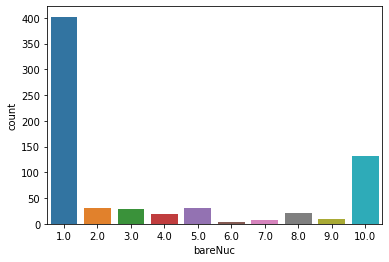

In [166]:
sns.countplot(cancer_data['bareNuc'])

In [167]:
cancer_data['bareNuc'].isnull().sum()

16

In [168]:
impute = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
data_complete = pd.DataFrame(impute.fit_transform(cancer_data))
data_complete.columns = cancer_data.columns
data_complete.index = cancer_data.index
data_complete.isnull().sum()

code           0
thickness      0
uniCelS        0
uniCelShape    0
marAdh         0
epiCelSize     0
bareNuc        0
blaChroma      0
normNuc        0
mitoses        0
class          0
dtype: int64

**1a)Use the Breast Cancer Dataset dataset breast-cancer-wisconsin.xlsx and fill in the missing
values. Then compute the Pearson correlation between any pair of variables, and store them in a
matrix.

In [169]:
corr, _ = pearsonr(data_complete['uniCelS'], data_complete['uniCelShape'])
print('Pearsons correlation: %.3f' % corr)
covariance= np.corrcoef(data_complete['uniCelS'], data_complete['uniCelShape'])
print(covariance)

Pearsons correlation: 0.907
[[1.         0.90688191]
 [0.90688191 1.        ]]


**1b)Create a graph from the correlation matrix and visualize it with a force-directed layout. Represent
each variable as a node in the graph. Insert an edge between two variables whenever the Pearson
correlation between them exceeds the threshold ρ > 0.6.

In [174]:
from graphviz import Graph
g = Graph('G',filename='process.gv', engine='fdp')
g.attr(size='6,6')

threshold = 0.6
if corr > threshold:
    g.edge('uniCelS', 'uniCelShape')
g.view()

'process.gv.pdf'

**1c) Modify the visual attributes of edges to reflect the magnitude of the correlation.

In [175]:
g = Graph('G',filename='process1.gv', engine='fdp')

threshold = 0.6
if corr > threshold:
    g.edge('uniCelS', 'uniCelShape',penwidth='6.0',len='3.00')
g.view()

'process1.gv.pdf'

**d) Produce an alternative visualization with a circular layout. Color the nodes so that there are four set of nodes, one color for having at least one correlation more than 0.9 to other nodes, another for having at least a correlation 0.8 < ρ max <= 0.9, one for having a correlation 0.6 < ρ max <= 0.8 and the last for the remaining nodes.

In [176]:
pearsoncorr = data_complete.corr(method='pearson')
pearsoncorr

,code,thickness,uniCelS,uniCelShape,marAdh,epiCelSize,bareNuc,blaChroma,normNuc,mitoses,class
code,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
uniCelS,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
uniCelShape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marAdh,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
epiCelSize,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bareNuc,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
blaChroma,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normNuc,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


In [177]:
g = Graph('G',filename='1d.gv', engine='circo')
g.attr(size='6,6')
g.node('code')
g.node('mitoses')

g.node('uniCelS',style="filled" ,fillcolor="#040666",fontcolor='white')
g.node('uniCelShape',style="filled" ,fillcolor="#040666",fontcolor='white')
g.node('bareNuc',style="filled" ,fillcolor="#497bb8")
g.node('class',style="filled" ,fillcolor="#497bb8")
g.node('marAdh',style="filled" ,fillcolor="#19fff4")
g.node('epiCelSize',style="filled" ,fillcolor="#19fff4")
g.node('blaChroma',style="filled" ,fillcolor="#19fff4")
g.node('thickness',style="filled" ,fillcolor="#19fff4")
g.node('normNuc',style="filled" ,fillcolor="#19fff4")



g.edge('class', 'bareNuc',penwidth='4.0',color="red")
g.edge('class', 'uniCelS',penwidth='4.0',color="red")
g.edge('class', 'normNuc',penwidth='2.0',color="red")
g.edge('class', 'epiCelSize',penwidth='1.0',color="red")
g.edge('class', 'blaChroma',penwidth='2.5',color="red")
g.edge('class', 'thickness',penwidth='1.0',color="red")
g.edge('class', 'marAdh',penwidth='1.0',color="red")
g.edge('class', 'uniCelShape',penwidth='3.0',color="red")

g.edge('bareNuc', 'uniCelShape',penwidth='1.5',color="red")
g.edge('bareNuc', 'uniCelS',penwidth='1.0',color="red")
g.edge('bareNuc', 'marAdh',penwidth='1.0',color="red")
g.edge('bareNuc', 'blaChroma',penwidth='1.0',color="red")

g.edge('uniCelS', 'uniCelShape',penwidth='6.0',color="red")
g.edge('uniCelS', 'normNuc',penwidth='1.0',color="red")
g.edge('uniCelS', 'epiCelSize',penwidth='2.0',color="red")
g.edge('uniCelS', 'blaChroma',penwidth='2.0',color="red")
g.edge('uniCelS', 'thickness',penwidth='0.2',color="red")
g.edge('uniCelS', 'marAdh',penwidth='1.0',color="red")

g.edge('normNuc', 'epiCelSize',penwidth='0.2',color="red")
g.edge('normNuc', 'blaChroma',penwidth='1.0',color="red")
g.edge('normNuc', 'uniCelShape',penwidth='1.5',color="red")

g.edge('epiCelSize', 'uniCelShape',penwidth='2.0',color="red")

g.edge('blaChroma', 'uniCelShape',penwidth='2.0',color="red")
g.edge('blaChroma', 'marAdh',penwidth='2.0',color="red")

g.edge('thickness', 'uniCelShape',penwidth='2.0',color="red")

g.edge('marAdh', 'uniCelShape',penwidth='2.0',color="red")
g.view()

'1d.gv.pdf'

**1e)At the selected threshold, which nodes are disconnected from the rest of the graph and what do they indicate?


Answer: From this visualization we can see 'code' and 'mitoses' do not have any edges with the other ones as the peasrson correlation coefficient is lower than a certain threshold. 

**If two nodes A and B are strongly correlated, and node C is strongly correlated with node B, can we conclude that node C will be also strongly correlated with node A?

**Based on the visualization, which variables would you propose to predict the class?

Answer: I would recommend uniCels, bareNuc and uniCelShape to predit the class.